# Analyse The Art Of War Book

In [1]:
import pandas as pd
import tweepy
import emoji
import re
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import numpy as np
from PIL import Image
import nltk
import nltk.tokenize 
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk import FreqDist
#nltk.download('punkt')
from nltk.corpus import stopwords
stopwords.words('english')
from collections import Counter
%matplotlib inline

In [2]:
%run ./keys.ipynb

## authentication to twitter API 

In [3]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [4]:
# create lists where we will store twitter data
num_of_tweets = 1000
tweets = []
likes = []
time = []

## retrieving and save tweet

In [5]:
#create a query to retrieve the tweet related to the book by choosing some parameters (language, date ...)
query = '"The Art Of War"'
for i in tweepy.Cursor(api.search, q = query, Since ='2021-01-01', lang = 'en', tweet_mode = "extended").items(num_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)

In [6]:
# put tweets in datafram and save as csv file 
the_Art_of_War_raw = pd.DataFrame({'tweets':tweets, 'likes':likes, 'time':time})
the_Art_of_War_raw.to_csv('the_Art_of_War_raw.csv', header = True, index = False, index_label = None, encoding = "UTF8")

## cleaning the tweets 

In [7]:
# clean RT and reset indexing
the_Art_of_War_cleaning = the_Art_of_War_raw[~the_Art_of_War_raw.tweets.str.contains("RT")]
the_Art_of_War_cleaning = the_Art_of_War_cleaning.reset_index(drop = True)

In [8]:
the_Art_of_War_cleaning["tweets"] = the_Art_of_War_cleaning["tweets"].str.replace("\n", " ") 

In [11]:
# cleaning https hashtag usertag emoji symbole 
for i in range(len(the_Art_of_War_cleaning['tweets'])):
    clean_tweet = re.sub("https://[A-Za-z0-9./]+", "", the_Art_of_War_cleaning['tweets'].values[i]).strip()
    clean_tweet = clean_tweet.lower()
    clean_tweet = re.sub("@[A-Za-z0-9_]+ ", "", clean_tweet) 
    clean_tweet = re.sub("#[A-Za-z0-9_]+ ", "", clean_tweet)
    clean_tweet = emoji.get_emoji_regexp().sub(r'', clean_tweet)
    clean_tweet = re.sub("[)(!,/;&-?\★@.“☀☆”✧⋇⋆#✦ಥ‿ಥ•^%]+", " ", clean_tweet)
    clean_tweet = clean_tweet.strip()
    the_Art_of_War_cleaning['tweets'].values[i] = clean_tweet

In [12]:
# vérification of cleaning 
the_Art_of_War_cleaning["tweets"].values[0:]

array(['everything conor said about dustin and jolie prefight was mental warfare  if you dont like it go read the book "the art of war"  everything conor said postfight about the poiriers just shows hes a pos ufc',
       'generally whenever somebody uses the term "fuzzy" they are talking about a situation where a character is trying to be in two states "at once" such as blocking for  different guards at once  gold fuzzy the art of war',
       'just out includes my historicalpractical intro annotation classic lionel giles’ translations of aow  amp tao te ching  amp integrated index of both works the art of war is a book of ethical power—not force which dies with its userintro',
       'prosaic and insipid its important for leaders to be stoic in times of crisis but this is rudderless and uninspiring hes either the greatest genius in the art of war keeping his cards close to his chest or out of his depth leading a party that isnt following',
       'unironically the art of war by sun t

## save Data clean as csv file

In [13]:
the_Art_of_War_cleaning.to_csv('Art_of_War_clean.csv', header = True, index = False, index_label = None)

## Analyse of tweets and visualization

In [14]:
# transform twittes to text
tweet_text = str(the_Art_of_War_cleaning['tweets'].values)
tweet_text = tweet_text.replace("\'\n", "")
tweet_text = tweet_text.replace("\'", "")

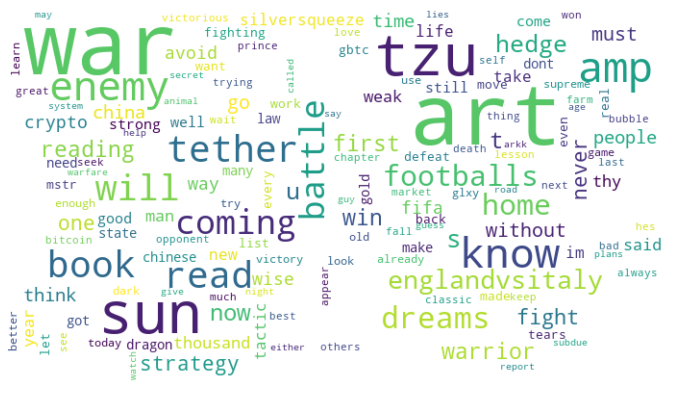

In [15]:
# wordc loud visualization
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12, 8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

#### so we have a lot of words that stand out, are related to the book but also words that express a return of the book

In [ ]:
# tokenization of the tweets text
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [ ]:
# creat a list of bigrams and trigrams that found in the of tweets
bigrams = list(ngrams(filtered, 2))
trigrams = list(ngrams(filtered, 3))

In [ ]:
# count Occurency of bigrams and trigrams words in the list of tweets 
a = Counter(bigrams)
b = Counter(trigrams) 

In [ ]:
# transform it to DataFram and keep top 30 of bigrams and trigrams
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns =['bigram','count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns = ['trigram','count'])

In [22]:
df_bigram.head()

,bigram,count
0,"(art, war)",321
1,"(sun, tzu)",97
2,"(tzu, art)",58
3,"(``, art)",27
4,"(war, '')",27


In [23]:
df_trigram.head()

,trigram,count
0,"(tzu, art, war)",58
1,"(sun, tzu, art)",42
2,"(``, art, war)",27
3,"(art, war, '')",27
4,"(footballs, coming, home)",26


<AxesSubplot:xlabel='count', ylabel='bigram'>

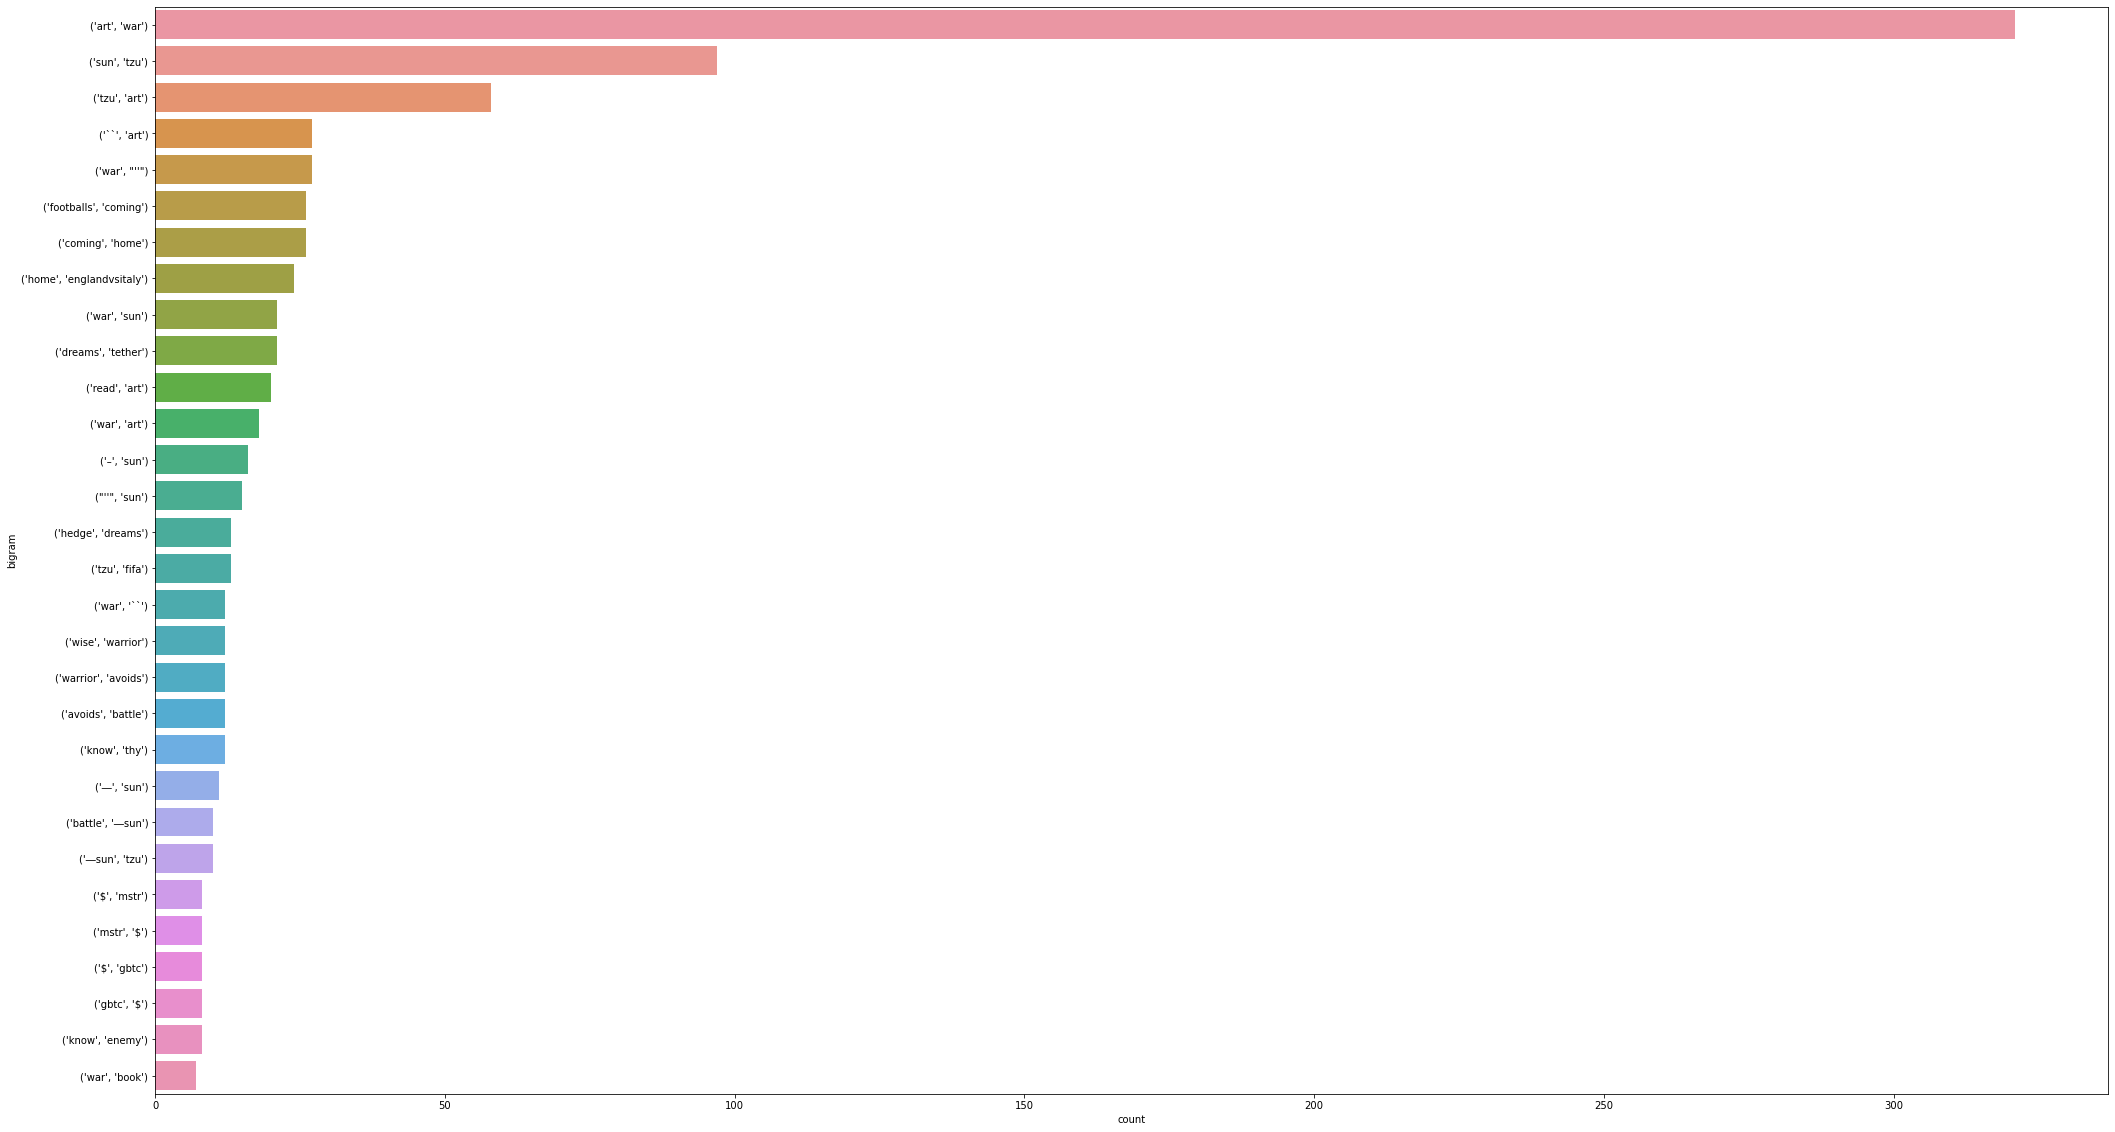

In [20]:
# bigrams visualization 
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_bigram['count'], y = df_bigram['bigram'])

###### we find many associations of words related to the title, the author or the characters of the book, or the words "read" "reading" "warrior"

<AxesSubplot:xlabel='count', ylabel='trigram'>

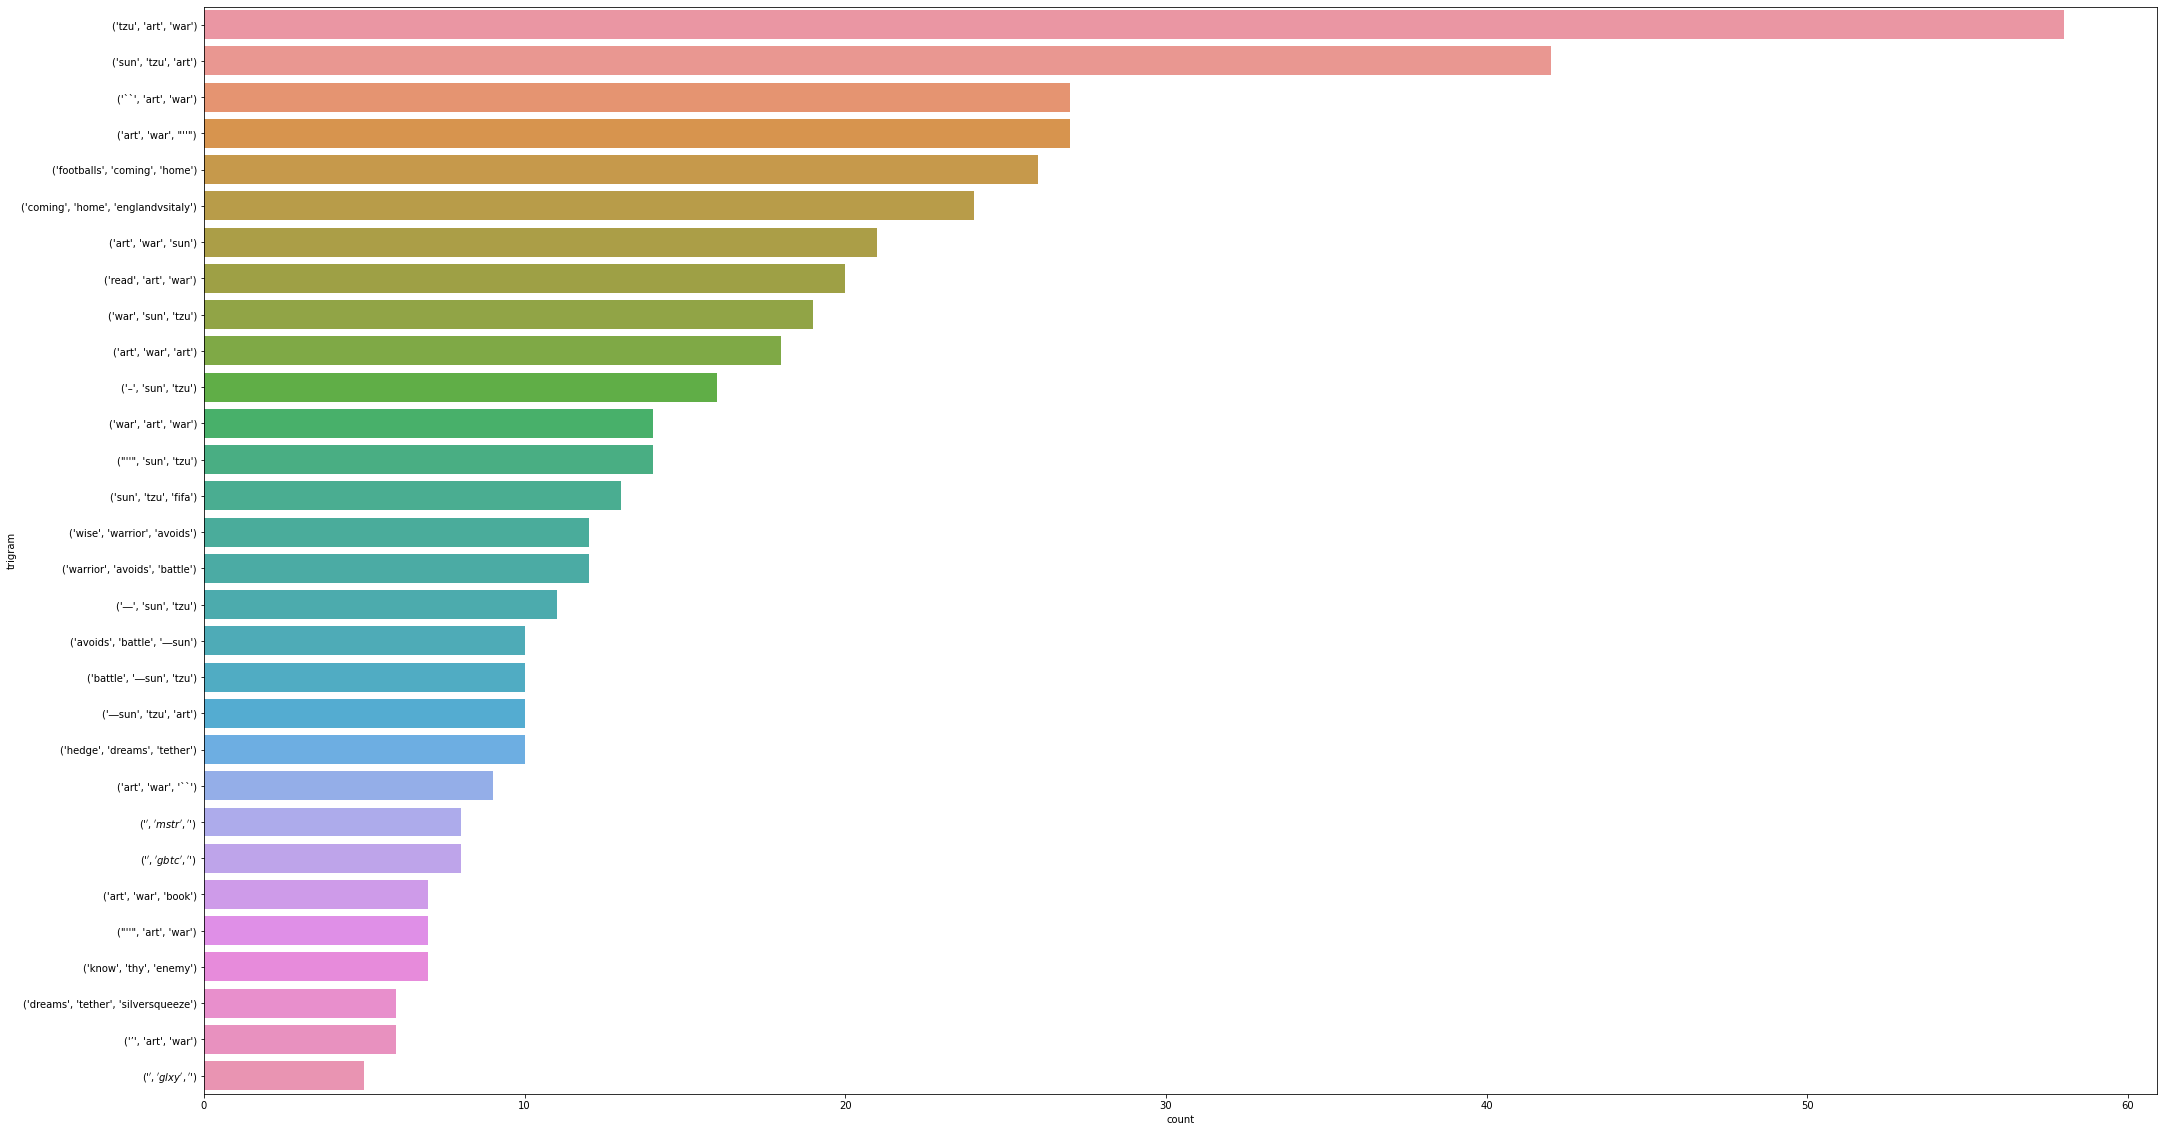

In [21]:
# trigrams visualization
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_trigram['count'], y = df_trigram['trigram'])

##### we find less association of words than the bigram, also related to the title, the author or the characters of the book, or the words "read" "battle" "dream"

In [24]:
# remove all words that take place in visualisation, bigrams and trigrams
tweet_text = tweet_text.replace("art", "")
tweet_text = tweet_text.replace("war", "")
tweet_text = tweet_text.replace("book", "")
tweet_text = tweet_text.replace("read", "")
tweet_text = tweet_text.replace("reading", "")
tweet_text = tweet_text.replace("sun", "")
tweet_text = tweet_text.replace("tzu", "")
tweet_text = tweet_text.replace("footballs", "")

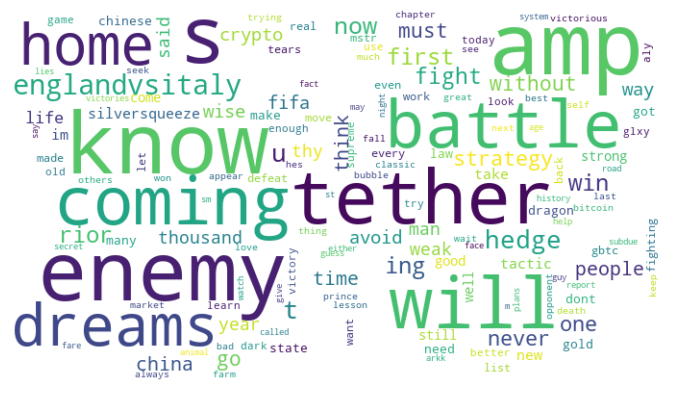

In [25]:
# wordc loud visualization
def plot_word_cloud(tweet_text, masque) :
    mask_coloring = np.array(Image.open(str(masque)))
    wc = WordCloud(width = 600, height = 600, background_color = "white", max_words = 150,
                   mask = mask_coloring, max_font_size = 90,
                   collocations = False, random_state = 42, margin = 2)

    plt.figure(figsize = (12, 8))
    wc.generate(tweet_text)
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('Twitter.jpg')

plot_word_cloud(tweet_text, 'E:\\Logos.png')

##### we find more words about the book, "enemy", "dreams", "battle",also about football club "englandvsitaly"

In [26]:
token = nltk.word_tokenize(tweet_text)
filtered = [word for word in token if word not in stopwords.words('english')]

In [27]:
bigrams = list(ngrams(filtered, 2))
trigrams = list(ngrams(filtered, 3))

In [28]:
a = Counter(bigrams)
b = Counter(trigrams) 

In [29]:
df_bigram = pd.DataFrame.from_records(a.most_common(30), columns =['bigram','count'])
df_trigram = pd.DataFrame.from_records(b.most_common(30), columns = ['trigram','count'])

<AxesSubplot:xlabel='count', ylabel='bigram'>

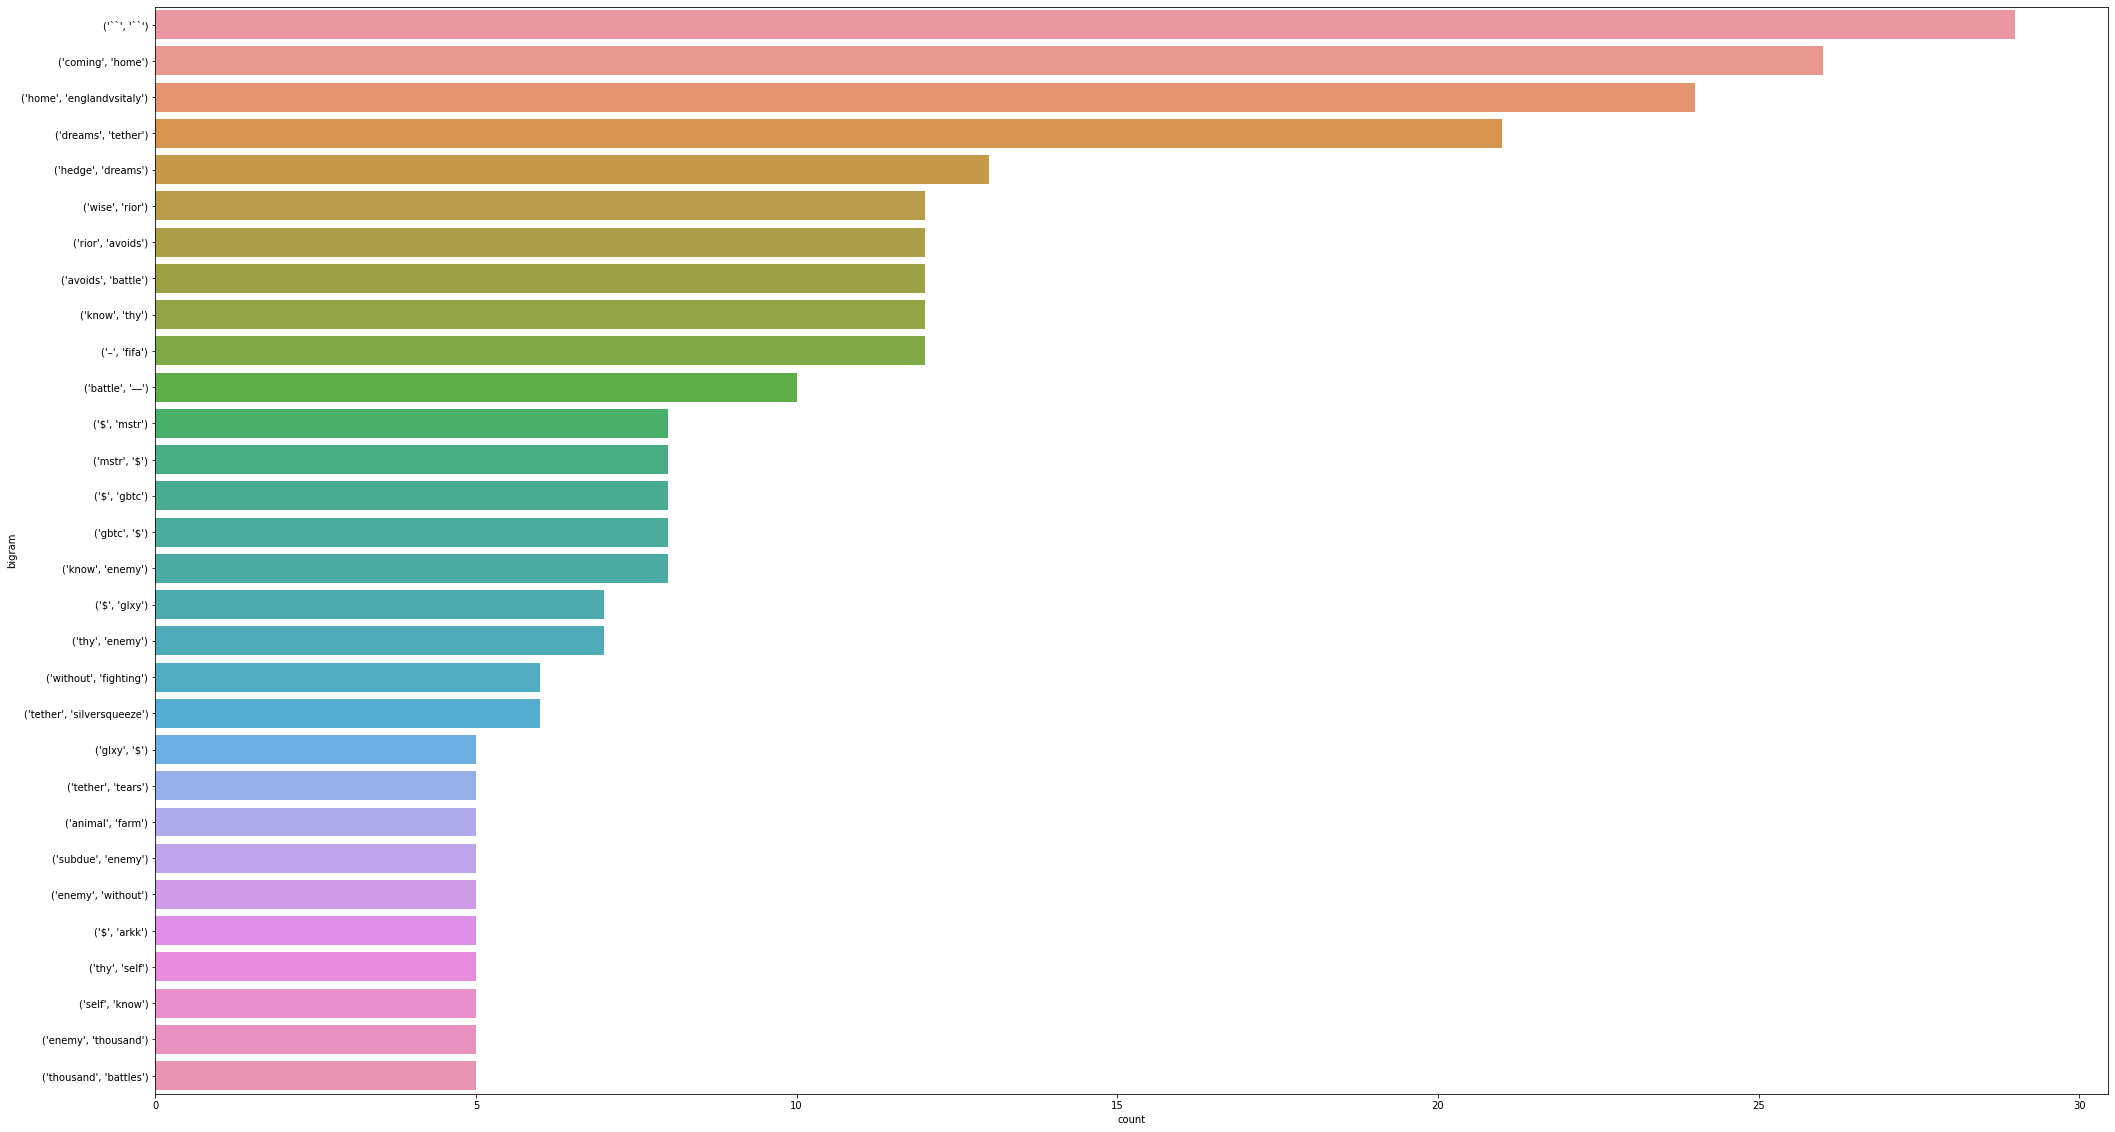

In [30]:
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_bigram['count'], y = df_bigram['bigram'])

#### we find more association than the first bigrams like "enemy thousand", "thousand battles" ....

<AxesSubplot:xlabel='count', ylabel='trigram'>

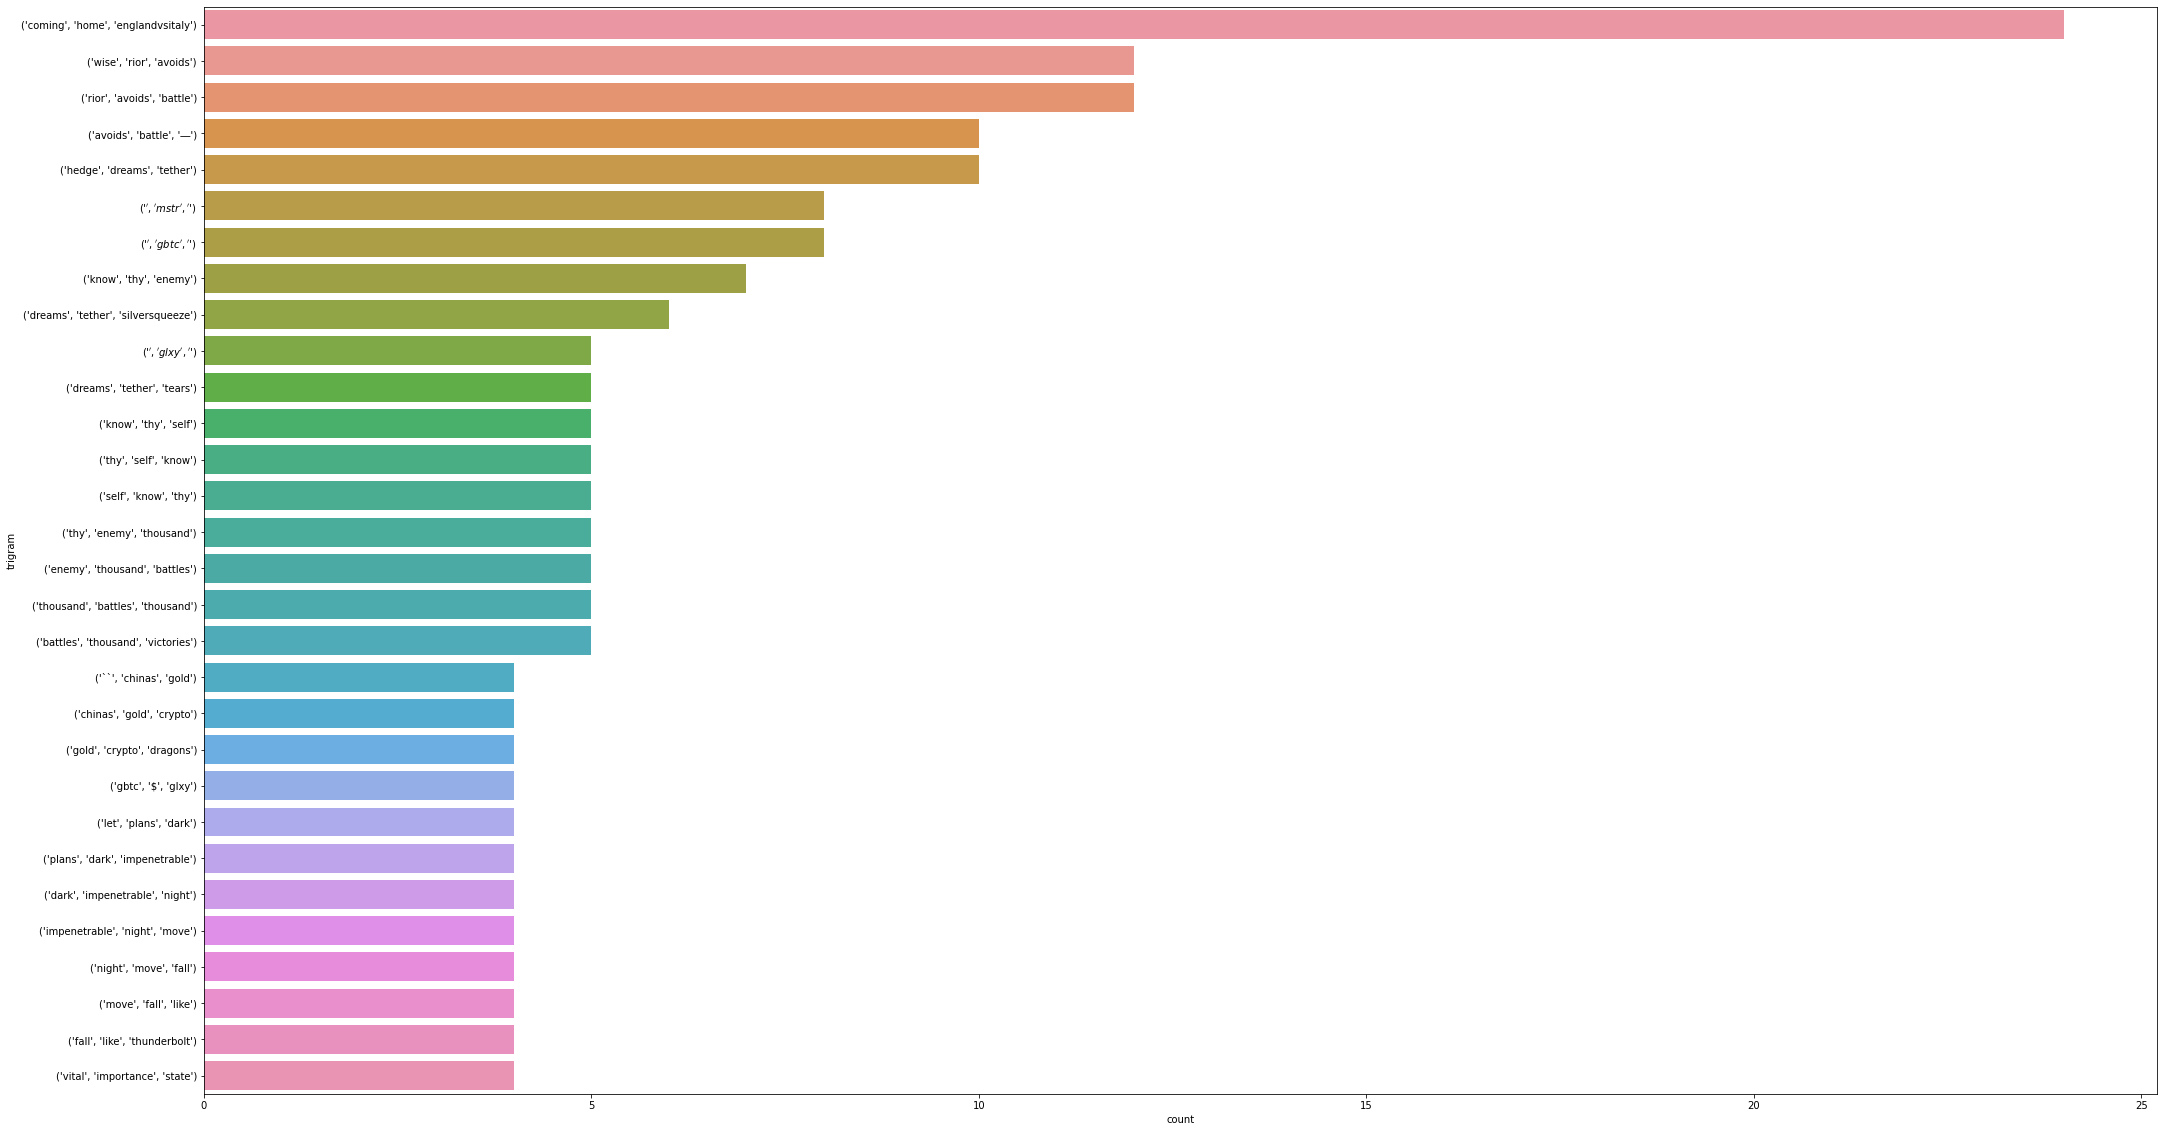

In [31]:
# trigrams visualization 
plt.figure(figsize = (35, 20))
plt.xlabel("Occurency")
plt.ylabel("Words_bigram")
sns.barplot(x = df_trigram['count'], y = df_trigram['trigram'])

#### we find more association than the first trigrams like "dark impenetrable night ", "fall like thunderbolt" ....